<h1>Prediction of Average Prices of Avocado in USA</h1>

<h2>Step 1: Importing our Dataset</h2>

In [1]:
import pandas as pd
dataset = pd.read_csv("avocado.csv")

In [2]:
dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
dataset.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


C:\Users\utkarsh gupta\AppData\Local\Temp\ipykernel_14128\2063244193.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  la_data = la_data.set_index('Date').resample('M').mean(numeric_only=True).reset_index()
C:\Users\utkarsh gupta\AppData\Local\Temp\ipykernel_14128\2063244193.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  chicago_data = chicago_data.set_index('Date').resample('M').mean(numeric_only=True).reset_index()


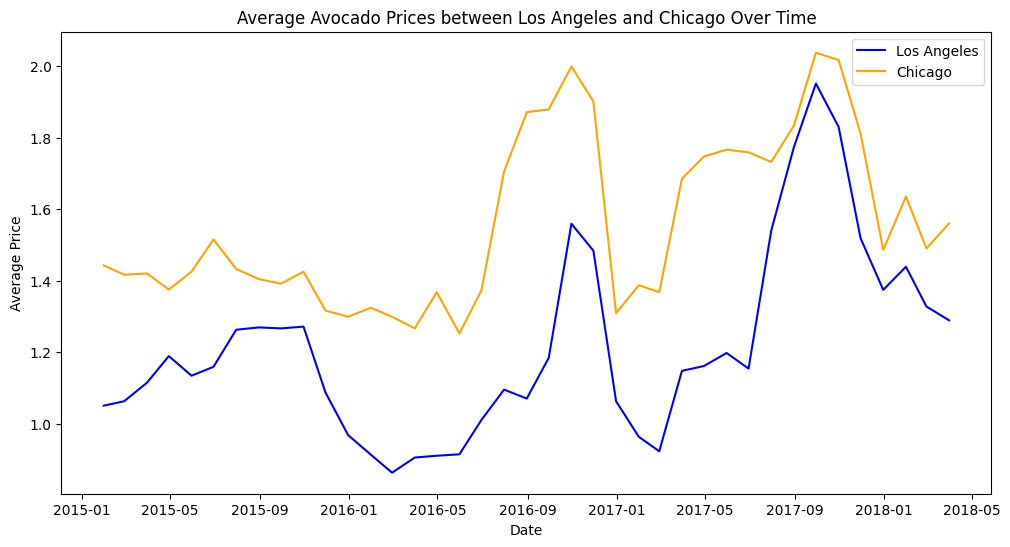

In [6]:
import matplotlib.pyplot as plt


dataset['Date'] = pd.to_datetime(dataset['Date'])

dataset['AveragePrice'] = pd.to_numeric(dataset['AveragePrice'], errors='coerce')

dataset = dataset.dropna(subset=['Date', 'AveragePrice'])

# Sort the dataset by Date
dataset = dataset.sort_values(by='Date')

# Filter data for Los Angeles and Chicago
la_data = dataset[dataset['region'] == 'LosAngeles']
chicago_data = dataset[dataset['region'] == 'Chicago']

# Resample by month and calculate the average price
la_data = la_data.set_index('Date').resample('M').mean(numeric_only=True).reset_index()
chicago_data = chicago_data.set_index('Date').resample('M').mean(numeric_only=True).reset_index()

# Plot average price over time for both regions with a rolling average
plt.figure(figsize=(12, 6))
plt.plot(la_data['Date'], la_data['AveragePrice'], label='Los Angeles', color='blue')
plt.plot(chicago_data['Date'], chicago_data['AveragePrice'], label='Chicago', color='orange')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Avocado Prices between Los Angeles and Chicago Over Time')
plt.legend()
plt.show()


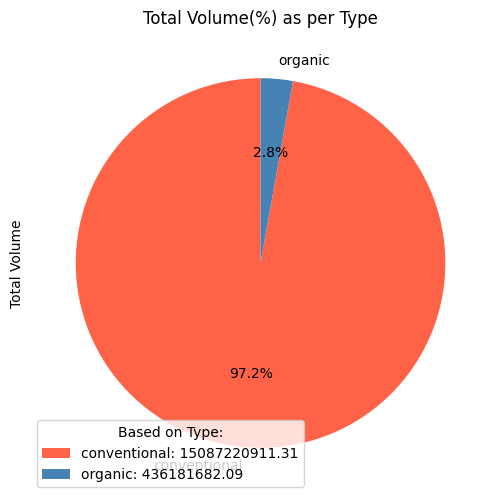

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
avocado_data = pd.read_csv("avocado.csv")

# Group data by 'type' and calculate the sum of 'Total Volume' for each type
type_volume = avocado_data.groupby('type')['Total Volume'].sum()

# Calculate percentage for each type
type_volume_percent = (type_volume / type_volume.sum()) * 100

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(type_volume_percent, labels=type_volume_percent.index, autopct='%1.1f%%', startangle=90, colors=['#ff6347', '#4682b4'])
plt.title("Total Volume(%) as per Type")

# Add legend and display the chart
plt.legend(title="Based on Type:", loc="lower left", labels=[f"{idx}: {val:.2f}" for idx, val in type_volume.items()])
plt.ylabel("Total Volume")
plt.show()


C:\Users\utkarsh gupta\AppData\Local\Temp\ipykernel_14128\2910411264.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=yearly_volume, x='year', y='Total Volume', hue='type', ci='sd')


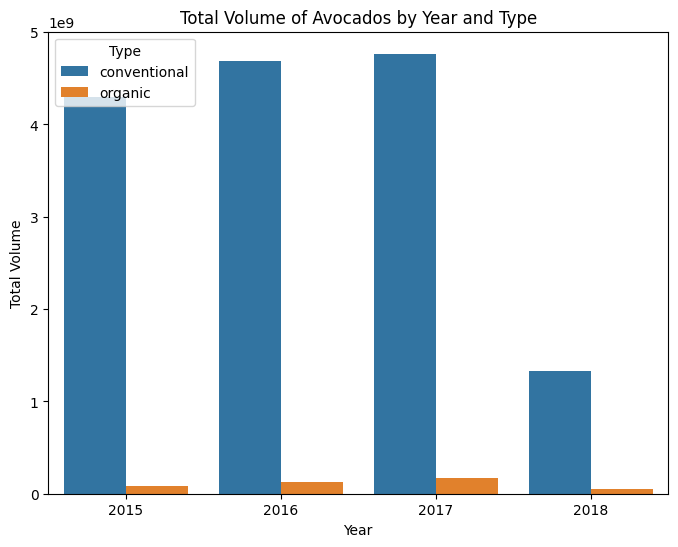

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avocado_data = pd.read_csv("avocado.csv")

# Group data by 'year' and 'type' and calculate the total volume for each group
yearly_volume = avocado_data.groupby(['year', 'type'])['Total Volume'].sum().reset_index()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=yearly_volume, x='year', y='Total Volume', hue='type', ci='sd')

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Total Volume")
plt.title("Total Volume of Avocados by Year and Type")
plt.legend(title="Type", loc="upper left")

# Display the chart
plt.show()


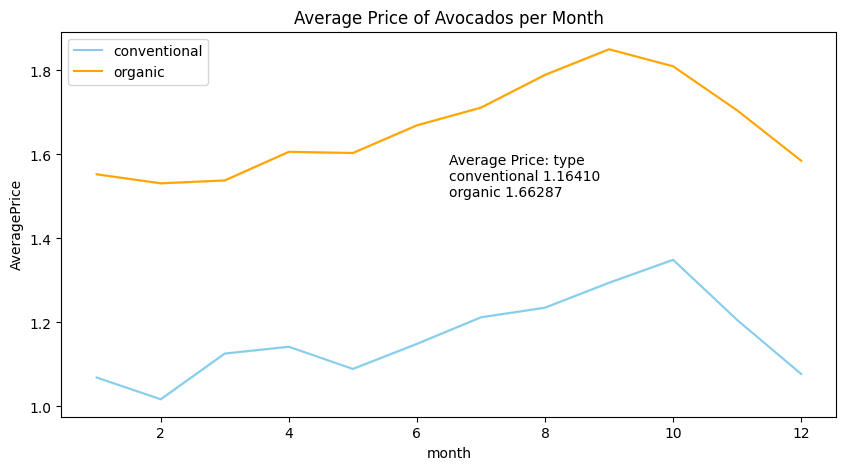

In [9]:
data = pd.read_csv('avocado.csv')

# Filter data for relevant columns and calculate the monthly average price
data['Date'] = pd.to_datetime(data['Date'])
data['month'] = data['Date'].dt.month
monthly_avg = data.groupby(['month', 'type'])['AveragePrice'].mean().unstack()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg['conventional'], label='conventional', color='skyblue')
plt.plot(monthly_avg.index, monthly_avg['organic'], label='organic', color='orange')

# Adding error bars (optional: you can remove this part if not needed)
plt.fill_between(monthly_avg.index, 
                 monthly_avg['conventional'], 
                 monthly_avg['conventional'], 
                 color='skyblue', alpha=0.3)
plt.fill_between(monthly_avg.index, 
                 monthly_avg['organic'], 
                 monthly_avg['organic'], 
                 color='orange', alpha=0.3)

# Labels and title
plt.xlabel('month')
plt.ylabel('AveragePrice')
plt.title('Average Price of Avocados per Month')
plt.legend()

# Display average prices as text on the plot
avg_conventional = monthly_avg['conventional'].mean()
avg_organic = monthly_avg['organic'].mean()
plt.text(6.5, 1.5, f'Average Price: type\nconventional {avg_conventional:.5f}\norganic {avg_organic:.5f}', fontsize=10)

plt.show()


In [10]:
dataset['Month']=dataset['Date'].apply(lambda x:x.month)
dataset['Day']=dataset['Date'].apply(lambda x:x.day)
dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast,1,4
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago,1,4
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton,1,4
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh,1,4
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise,1,4


<h2>Step 2: Analysis of Average Prices</h2>

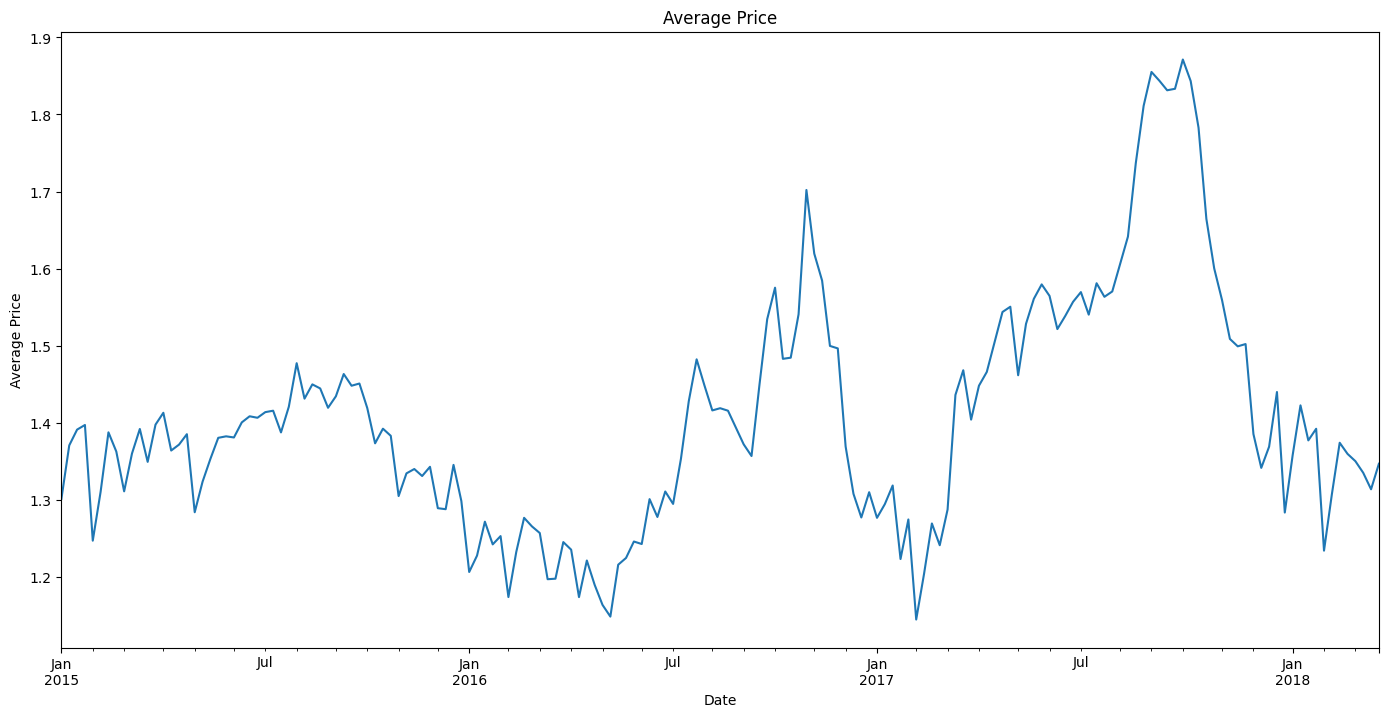

In [11]:
import matplotlib.pyplot as plt

dataset['Date'] = pd.to_datetime(dataset['Date'])

dataset['AveragePrice'] = pd.to_numeric(dataset['AveragePrice'], errors='coerce')

byDate = dataset.groupby('Date')[['AveragePrice']].mean()

# Plotting
plt.figure(figsize=(17, 8), dpi=100)
byDate['AveragePrice'].plot()
plt.title('Average Price')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

<h2>Step 3: Taking Care of the Outliers</h2>

In [12]:
dataset.drop(columns=["Date"],inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 11569 to 8814
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 2.1+ MB


In [13]:
import numpy as np
from numpy import percentile

columns = dataset.columns
for j in columns:
    if isinstance(dataset[j][0], str) :
        continue
    else:
        #defining quartiles
        quartiles = percentile(dataset[j], [25,75])
        # calculate min/max
        lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
        upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
        dataset[j] = dataset[j].apply(lambda x: upper_fence if x > upper_fence else (lower_fence if x < lower_fence else x))

In [14]:
dataset.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
11569,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast,1,4
9593,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago,1,4
10009,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton,1,4
1819,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh,1,4
9333,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise,1,4


<h2>Step 4: Taking Care of the Categorical Variables</h2>

In [15]:
dataset['region'] = pd.Categorical(dataset['region'])
dfDummies_region = pd.get_dummies(dataset['region'], prefix = 'region').astype(int)
dfDummies_region

,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
11569,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9593,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1819,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9333,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9018,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
18141,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
17673,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
dataset = pd.concat([dataset, dfDummies_region], axis=1)
dataset.drop(columns="region",inplace=True)
dataset

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
11569,1.75,27365.890,9307.340,3844.81,615.28,13598.460,13061.100,537.36,0.00,organic,...,0,0,1,0,0,0,0,0,0,0
9593,1.49,17723.170,1189.350,15628.27,0.00,905.550,905.550,0.00,0.00,organic,...,0,0,0,0,0,0,0,0,0,0
10009,1.68,2896.720,161.680,206.96,0.00,2528.080,2528.080,0.00,0.00,organic,...,0,0,0,0,0,0,0,0,0,0
1819,1.52,54956.800,3013.040,35456.88,1561.70,14925.180,11264.800,3660.38,0.00,conventional,...,0,0,0,0,0,0,0,0,0,0
9333,1.64,1505.120,1.270,1129.50,0.00,374.350,186.670,187.68,0.00,organic,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,1.36,908202.130,142681.060,371003.98,15608.55,127409.040,103579.410,22467.04,331.25,conventional,...,0,0,0,0,0,0,0,0,0,0
9018,0.70,1066147.855,276269.395,371003.98,15608.55,269325.465,204070.045,54881.92,331.25,conventional,...,0,1,0,0,0,0,0,0,0,0
18141,1.42,163496.700,29253.300,5080.04,0.00,129163.360,109052.260,20111.10,0.00,organic,...,0,1,0,0,0,0,0,0,0,0
17673,1.70,190257.380,29644.090,70982.10,0.00,89631.190,89424.110,207.08,0.00,organic,...,0,0,0,0,0,0,0,0,0,0


In [17]:
dataset['Month'] = pd.Categorical(dataset['Month'])
dfDummies_month = pd.get_dummies(dataset['Month'], prefix = 'month').astype(int)
dfDummies_month

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
11569,1,0,0,0,0,0,0,0,0,0,0,0
9593,1,0,0,0,0,0,0,0,0,0,0,0
10009,1,0,0,0,0,0,0,0,0,0,0,0
1819,1,0,0,0,0,0,0,0,0,0,0,0
9333,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,0,1,0,0,0,0,0,0,0,0,0
9018,0,0,1,0,0,0,0,0,0,0,0,0
18141,0,0,1,0,0,0,0,0,0,0,0,0
17673,0,0,1,0,0,0,0,0,0,0,0,0


In [18]:
dataset = pd.concat([dataset, dfDummies_month], axis=1)
dataset.drop(columns="Month",inplace=True)
dataset

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
11569,1.75,27365.890,9307.340,3844.81,615.28,13598.460,13061.100,537.36,0.00,organic,...,0,0,0,0,0,0,0,0,0,0
9593,1.49,17723.170,1189.350,15628.27,0.00,905.550,905.550,0.00,0.00,organic,...,0,0,0,0,0,0,0,0,0,0
10009,1.68,2896.720,161.680,206.96,0.00,2528.080,2528.080,0.00,0.00,organic,...,0,0,0,0,0,0,0,0,0,0
1819,1.52,54956.800,3013.040,35456.88,1561.70,14925.180,11264.800,3660.38,0.00,conventional,...,0,0,0,0,0,0,0,0,0,0
9333,1.64,1505.120,1.270,1129.50,0.00,374.350,186.670,187.68,0.00,organic,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,1.36,908202.130,142681.060,371003.98,15608.55,127409.040,103579.410,22467.04,331.25,conventional,...,1,0,0,0,0,0,0,0,0,0
9018,0.70,1066147.855,276269.395,371003.98,15608.55,269325.465,204070.045,54881.92,331.25,conventional,...,1,0,0,0,0,0,0,0,0,0
18141,1.42,163496.700,29253.300,5080.04,0.00,129163.360,109052.260,20111.10,0.00,organic,...,1,0,0,0,0,0,0,0,0,0
17673,1.70,190257.380,29644.090,70982.10,0.00,89631.190,89424.110,207.08,0.00,organic,...,1,0,0,0,0,0,0,0,0,0


In [19]:
from sklearn import preprocessing 
 
label_encoder = preprocessing.LabelEncoder() 
dataset['type']= label_encoder.fit_transform(dataset['type']) 
dataset

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
11569,1.75,27365.890,9307.340,3844.81,615.28,13598.460,13061.100,537.36,0.00,1,...,0,0,0,0,0,0,0,0,0,0
9593,1.49,17723.170,1189.350,15628.27,0.00,905.550,905.550,0.00,0.00,1,...,0,0,0,0,0,0,0,0,0,0
10009,1.68,2896.720,161.680,206.96,0.00,2528.080,2528.080,0.00,0.00,1,...,0,0,0,0,0,0,0,0,0,0
1819,1.52,54956.800,3013.040,35456.88,1561.70,14925.180,11264.800,3660.38,0.00,0,...,0,0,0,0,0,0,0,0,0,0
9333,1.64,1505.120,1.270,1129.50,0.00,374.350,186.670,187.68,0.00,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,1.36,908202.130,142681.060,371003.98,15608.55,127409.040,103579.410,22467.04,331.25,0,...,1,0,0,0,0,0,0,0,0,0
9018,0.70,1066147.855,276269.395,371003.98,15608.55,269325.465,204070.045,54881.92,331.25,0,...,1,0,0,0,0,0,0,0,0,0
18141,1.42,163496.700,29253.300,5080.04,0.00,129163.360,109052.260,20111.10,0.00,1,...,1,0,0,0,0,0,0,0,0,0
17673,1.70,190257.380,29644.090,70982.10,0.00,89631.190,89424.110,207.08,0.00,1,...,1,0,0,0,0,0,0,0,0,0


<h2>Step 5: Model Fitting</h2>

In [20]:
dataset.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
11569,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,1,...,0,0,0,0,0,0,0,0,0,0
9593,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,1,...,0,0,0,0,0,0,0,0,0,0
10009,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1819,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,0,...,0,0,0,0,0,0,0,0,0,0
9333,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,1,...,0,0,0,0,0,0,0,0,0,0


**Having a look at our data after complete preprocessing.**

**Splitting our dataset to training and test numpy arrays with the names having their intended meaning. Where we are using 80% of our dataset for training and 20% of the data for testing.**

In [21]:
X=dataset.iloc[:,1:78]
y=dataset['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)
y_test = np.array(y_test,dtype = float)

**Normalizing our X_train and X_test using standard scaler**

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

The above code standardizes the features in X_train and X_test by subtracting the mean and dividing by the standard deviation, ensuring that both datasets are on the same scale.

**The funtion regression_results defined below calculates and prints the following features of a model: explained_variance, r2, adjusted_r2, MAE, MSE, RMSE. It accepts the original and predicted values as its arguments.**

In [23]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1-r2)*(len(y_true)-1)/(len(y_true)-X_test.shape[1]-1)

    print('Explained_variance: ', round(explained_variance,4))    
    print('R2: ', round(r2,4))
    print('Adjusted_r2: ', round(adjusted_r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

**Below is a function to find the accuracy of each model on the basis of K-fold cross validation.**

In [24]:
from sklearn.model_selection import cross_val_score
def model_accuracy(model,X_train=X_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [25]:
dataset.to_csv("Processed_data.csv", index=False)

<h3>Fitting Multiple Linear Regression Model</h3>

**The following code snippet fits the multiple linear regression model on X_train and y_train and predicts the values for X_test and stores it in y_pred. It also prints the outputs of the functions defined above. Hence giving us a useful summary for the multiple linear regression model.**

In [26]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
regression_results(y_test,y_pred)
model_accuracy(regressor)

Explained_variance:  0.6459
R2:  0.6459
Adjusted_r2:  0.6383
MAE:  0.1814
MSE:  0.0562
RMSE:  0.237
Accuracy: 64.70 %
Standard Deviation: 1.03 %


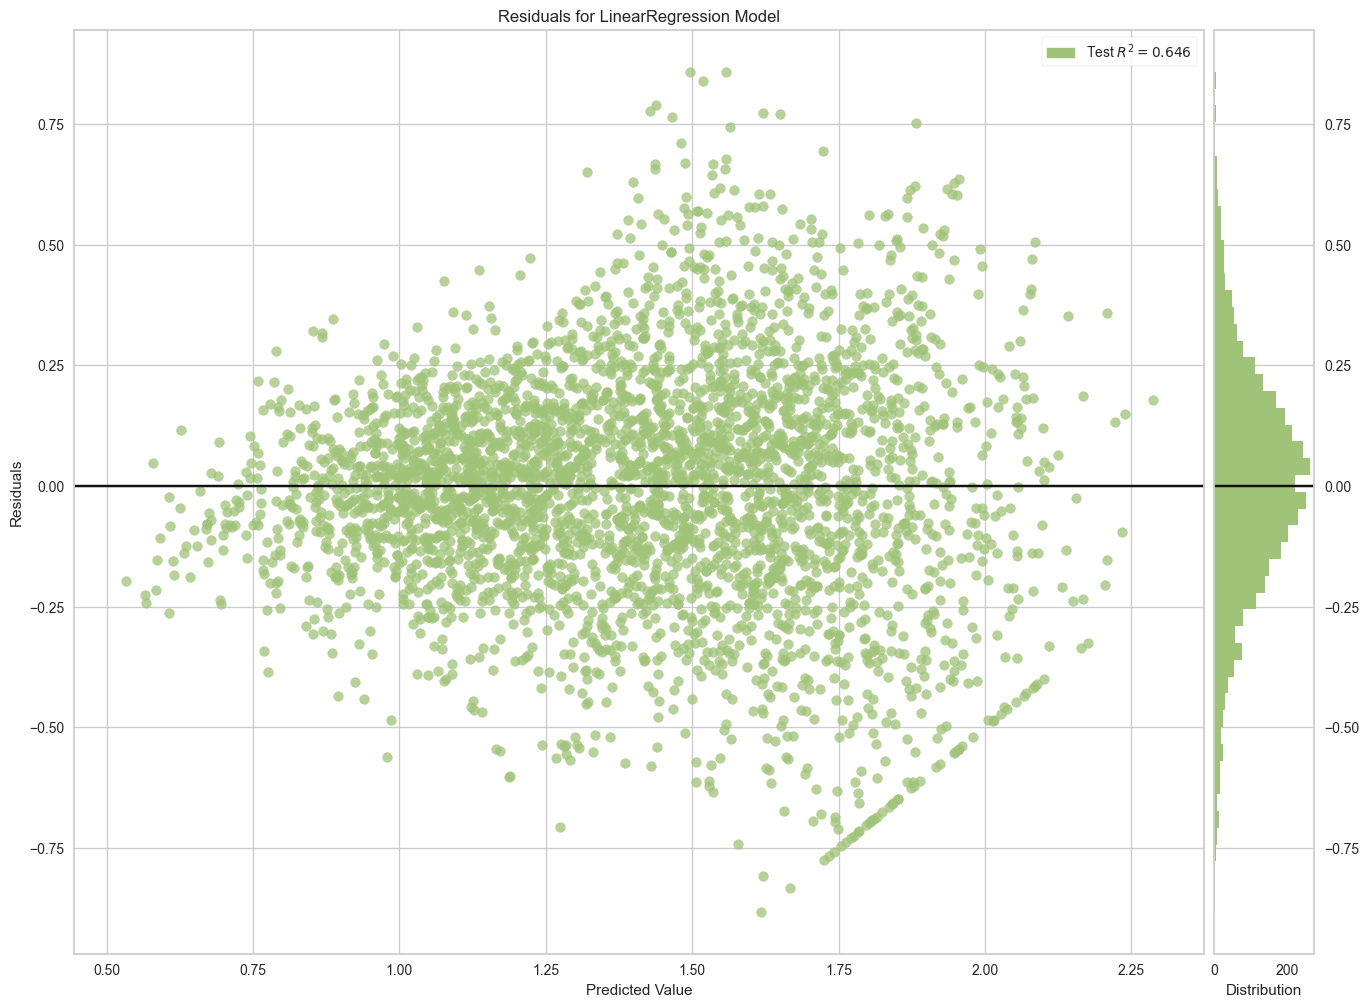

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [27]:
from yellowbrick.regressor import ResidualsPlot

fig = plt.figure(figsize=(16, 12),dpi=100)
visualizer = ResidualsPlot(regressor, hist = True, qqplot = False)
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

<h3>Fitting Random Forest Regression Model</h3>

**The following code snippet fits the random forest regression model on X_train and y_train and predicts the values for X_test and stores it in y_pred_rf. It also prints the outputs of the functions defined above. Hence giving us a useful summary for the random forest regression model.**

In [28]:
from sklearn.ensemble import RandomForestRegressor

rand_regressor = RandomForestRegressor()
rand_regressor.fit(X_train, y_train)
y_pred_rf = rand_regressor.predict(X_test)
regression_results(y_test,y_pred_rf)
model_accuracy(rand_regressor)

Explained_variance:  0.8974
R2:  0.8974
Adjusted_r2:  0.8952
MAE:  0.0906
MSE:  0.0163
RMSE:  0.1276
Accuracy: 88.87 %
Standard Deviation: 0.65 %


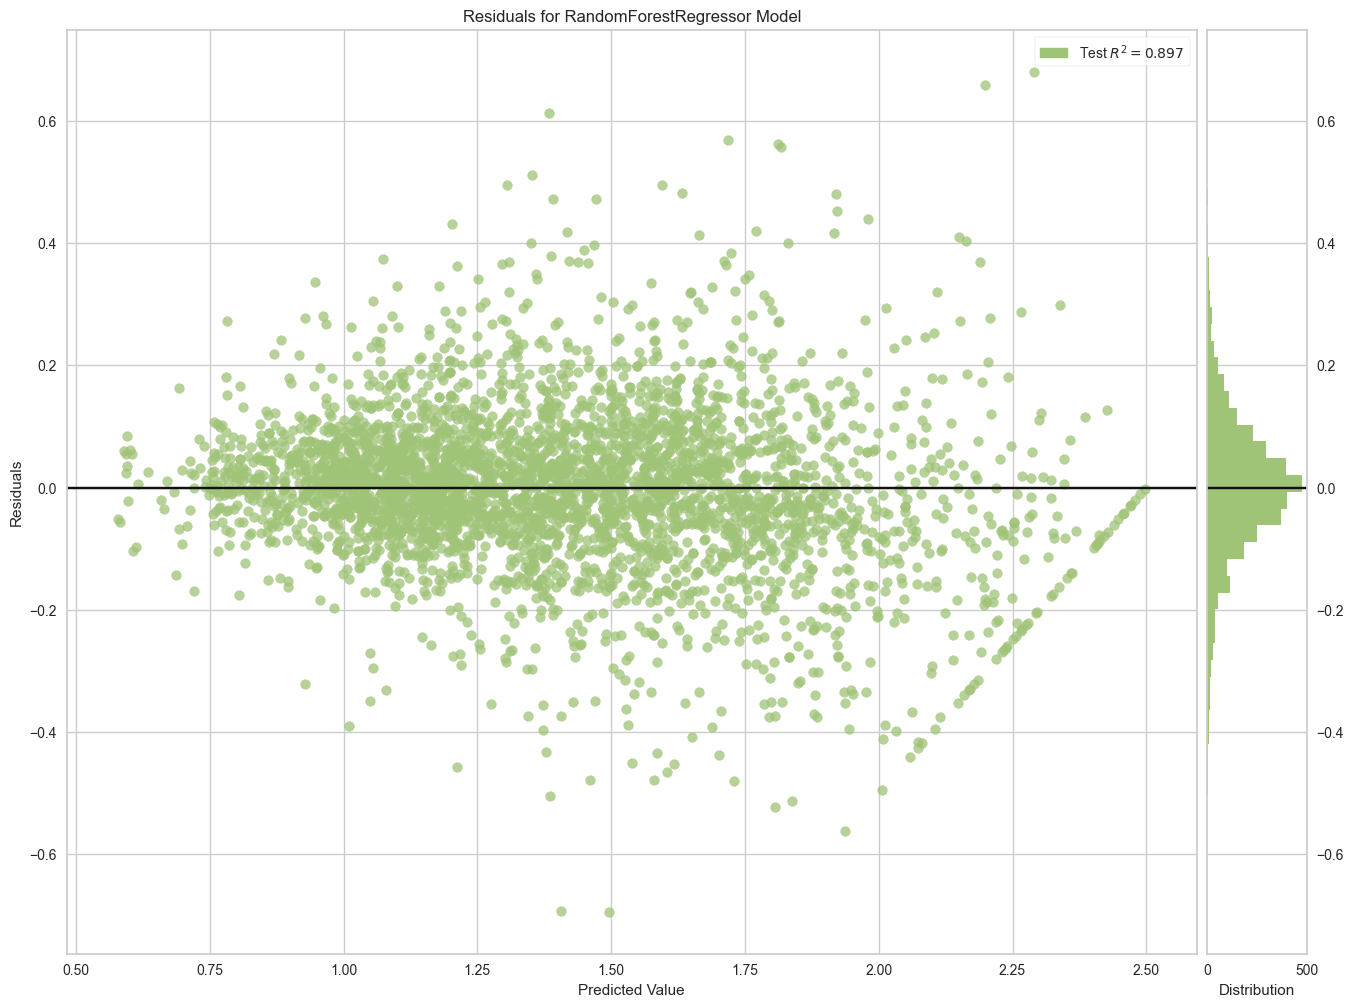

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [29]:
fig = plt.figure(figsize=(16, 12),dpi=100)
visualizer = ResidualsPlot(rand_regressor, hist = True, qqplot = False)
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

<h3>Fitting Decision Tree Regression Model</h3>

**The following code snippet fits the decision tree regression model on X_train and y_train and predicts the values for X_test and stores it in y_pred_dt. It also prints the outputs of the functions defined above. Hence giving us a useful summary for the decision tree regression model.**

In [30]:
from sklearn.tree import DecisionTreeRegressor

decision_tree=DecisionTreeRegressor(criterion='squared_error',splitter='random',random_state=10)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
regression_results(y_test,y_pred_dt)
model_accuracy(decision_tree)

Explained_variance:  0.8121
R2:  0.8121
Adjusted_r2:  0.808
MAE:  0.1114
MSE:  0.0298
RMSE:  0.1727
Accuracy: 81.19 %
Standard Deviation: 1.45 %


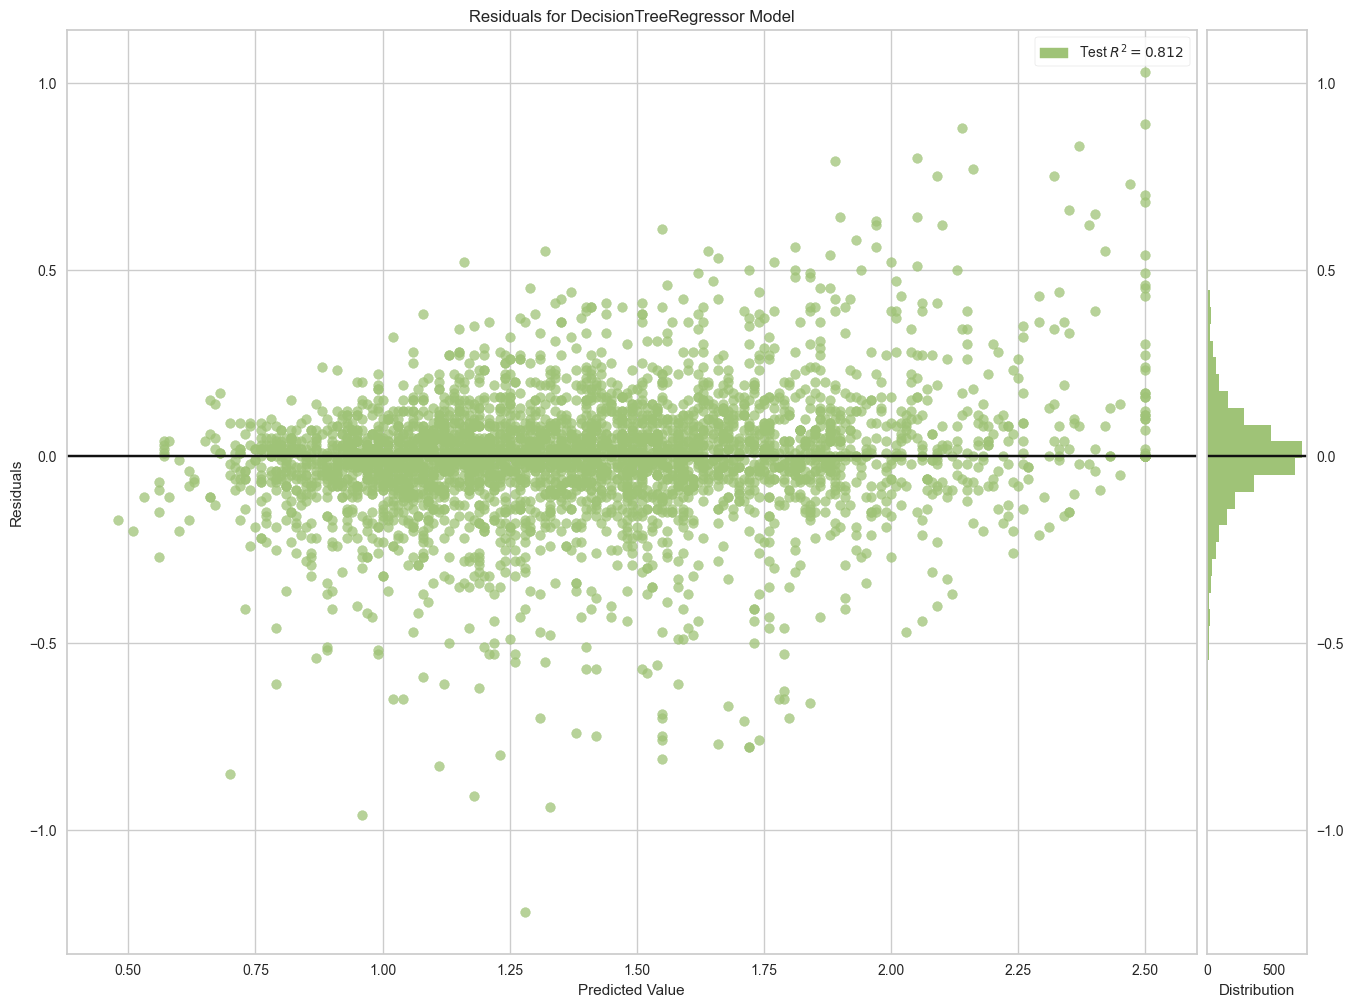

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [31]:
fig = plt.figure(figsize=(16, 12),dpi=100)
visualizer = ResidualsPlot(decision_tree, hist = True, qqplot = False)
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

<h3>XGBoost Regression Model</h3>

**The following code snippet fits the XGBoost regression model on X_train and y_train and predicts the values for X_test and stores it in y_pred_dt. It also prints the outputs of the functions defined above. Hence giving us a useful summary for the XGBoost regression model.**

In [32]:
from xgboost import XGBRegressor

xgb_regressor = XGBRegressor()

# Fit the model to the training data
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_regressor.predict(X_test)

# Evaluate the model's performance (assuming regression_results and model_accuracy functions are defined)
regression_results(y_test, y_pred_xgb)
model_accuracy(xgb_regressor)


Explained_variance:  0.9084
R2:  0.9084
Adjusted_r2:  0.9064
MAE:  0.0888
MSE:  0.0145
RMSE:  0.1206
Accuracy: 89.70 %
Standard Deviation: 0.68 %


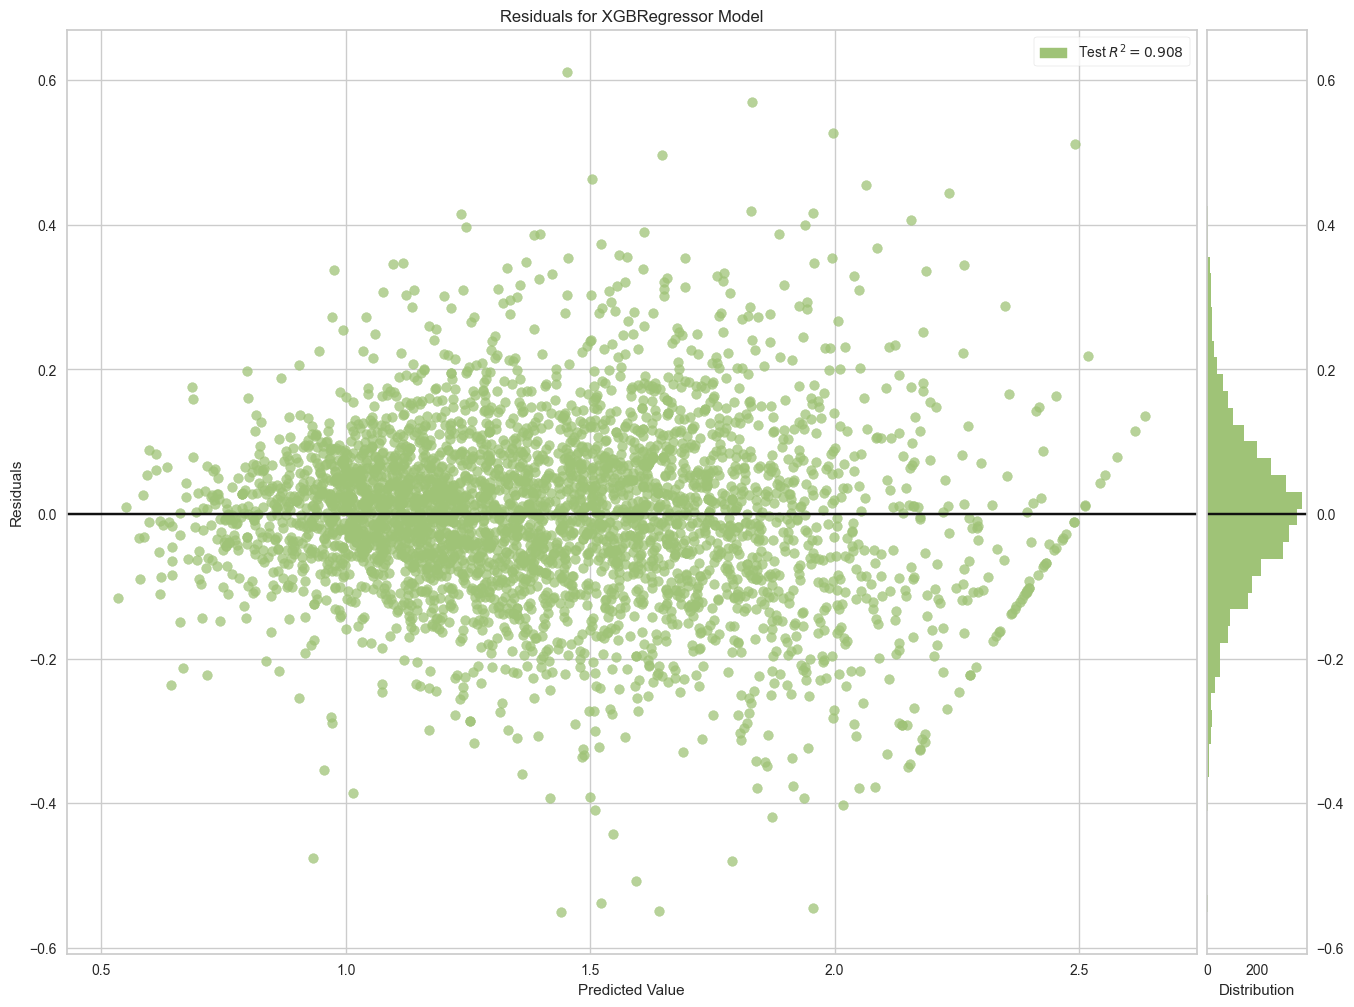

<Axes: title={'center': 'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [33]:
fig = plt.figure(figsize=(16, 12),dpi=100)
visualizer = ResidualsPlot(xgb_regressor, hist = True, qqplot = False)
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()  

<h3>Exporting the model using joblib</h3>

In [34]:
import joblib

# Assuming xgb_regressor is the trained XGBRegressor model
joblib.dump(xgb_regressor, "xgb_regressor_model.pkl")

['xgb_regressor_model.pkl']

<h3>Trainning for the model is Completed!!!!</h3>